In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.model_selection import cross_val_score,KFold
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [3]:
train=pd.read_csv('D:\Train_tum.csv')
test=pd.read_csv('D:\Test_tum.csv')  

In [4]:
train.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [5]:
test.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
0,4946.44,914.06,0.18479,54.5566,6.628345e+05,67.0525,2301.76,22,41.9554
1,5613.85,1629.12,0.29019,51.5524,7.842271e+05,80.1986,3235.00,48,40.7410
2,12421.10,3062.41,0.24654,154.1560,1.763575e+06,186.8590,4684.63,63,29.4778
3,6830.77,2457.66,0.35979,56.8995,9.296623e+05,92.7361,3211.93,42,38.5027
4,33407.80,12353.60,0.36978,219.0740,4.595871e+06,493.3370,13389.36,187,26.8449


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
mass_npea         9146 non-null float64
size_npear        9146 non-null float64
malign_ratio      9146 non-null float64
damage_size       9146 non-null float64
exposed_area      9146 non-null float64
std_dev_malign    9146 non-null float64
err_malign        9146 non-null float64
malign_penalty    9146 non-null int64
damage_ratio      9146 non-null float64
tumor_size        9146 non-null float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


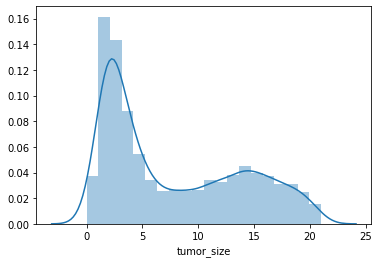

In [7]:
sns.distplot(train['tumor_size'])

In [8]:
train.corr()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
mass_npea,1.000000,0.907335,0.123411,0.930691,0.998167,0.968006,0.617207,0.654849,-0.901106,-0.004679
size_npear,0.907335,1.000000,0.499398,0.794096,0.903502,0.907932,0.570343,0.593019,-0.791768,0.164761
malign_ratio,0.123411,0.499398,1.000000,0.029167,0.119389,0.196430,0.081228,0.102475,-0.068605,0.374273
damage_size,0.930691,0.794096,0.029167,1.000000,0.925266,0.938202,0.535834,0.676904,-0.892006,-0.163804
exposed_area,0.998167,0.903502,0.119389,0.925266,1.000000,0.962462,0.617149,0.646444,-0.900717,-0.003641
std_dev_malign,0.968006,0.907932,0.196430,0.938202,0.962462,1.000000,0.597842,0.667264,-0.884481,-0.030085
err_malign,0.617207,0.570343,0.081228,0.535834,0.617149,0.597842,1.000000,0.381454,-0.583945,0.004484
malign_penalty,0.654849,0.593019,0.102475,0.676904,0.646444,0.667264,0.381454,1.000000,-0.646893,0.011871
damage_ratio,-0.901106,-0.791768,-0.068605,-0.892006,-0.900717,-0.884481,-0.583945,-0.646893,1.000000,0.054892
tumor_size,-0.004679,0.164761,0.374273,-0.163804,-0.003641,-0.030085,0.004484,0.011871,0.054892,1.000000


In [5]:
sc = StandardScaler()
train1 = train.drop('tumor_size',axis = 1)

trains = sc.fit_transform(train1)
tests = sc.transform(test)
y = train['tumor_size']

In [7]:
import statsmodels.api as sm
X_constant = sm.add_constant(trains)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tumor_size   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     413.1
Date:                Sat, 08 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:40:15   Log-Likelihood:                -27935.
No. Observations:                9146   AIC:                         5.589e+04
Df Residuals:                    9136   BIC:                         5.596e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7233      0.054    143.864      0.000       7.618       7.829
x1             7.4056      1.100      6.730      0.000       5.249       9.563
x2             1.7718      0.369      4.805      0.000       1.049       2.495
x3             1.2402      0.150      8.283      0.000       0.947       1.534
x4            -6.0605      0.201    -30.113      0.000      -6.455      -5.666
x5            -2.5230      0.936     -2.695      0.007      -4.358      -0.688
x6            -1.9327      0.271     -7.129      0.000      -2.464      -1.401
x7            -0.3327      0.070     -4.765      0.000      -0.470      -0.196
x8             0.8454      0.075     11.330      0.000       0.699       0.992
x9            -0.5400      0.135     -4.013      0.000      -0.804      -0.276
==============================================================================
Omnibus:                      339.208   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.712
Skew:                           0.438   Prob(JB):                     1.71e-74
Kurtosis:                       2.646   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
d = train1.copy(deep = True)

sns.set(style = 'whitegrid')
d['Predictions'] = model.predict(X_constant)
residuals = model.resid
residuals


0       1.362151
1      -2.330515
2      -2.489963
3      -3.786549
4       9.205641
          ...   
9141    3.081378
9142    6.592228
9143   -2.876140
9144    1.614867
9145    6.488978
Length: 9146, dtype: float64

KeyboardInterrupt: 

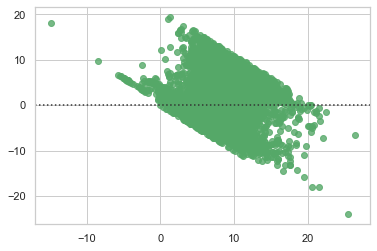

In [9]:
ax = sns.residplot(d.Predictions, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

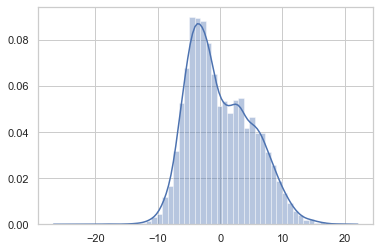

In [10]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)

In [11]:
final_df = d.transform(lambda x: x ** 0.5)   # Applying sqrt Transformation.

final_df.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,Predictions
0,83.252027,54.027956,0.648968,7.199292,994.399018,10.463604,52.523899,8.485281,6.273914,3.569433
1,125.042793,69.852416,0.558623,14.951589,1434.721681,15.775963,77.152641,15.491933,4.693112,2.231259
2,101.863634,51.126119,0.501906,11.284370,1197.779654,12.652786,68.082744,8.544004,5.476888,2.044007
3,114.428143,67.156980,0.586890,12.467558,1346.177991,13.153517,72.621416,5.656854,5.304281,2.753643
4,86.863168,53.687615,0.618070,9.226251,1021.722810,11.154102,57.125739,7.549834,5.917770,2.969404


In [12]:
test_final = test.transform(lambda x : x ** 0.5)

In [13]:
final_train = final_df.drop('Predictions',axis = 1)
trains1 = sc.fit_transform(final_train)
tests1 = sc.transform(test_final)
X_const = sm.add_constant(trains1)
model1 = sm.OLS(y, X_const).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tumor_size   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     441.7
Date:                Sat, 08 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:41:44   Log-Likelihood:                -27844.
No. Observations:                9146   AIC:                         5.571e+04
Df Residuals:                    9136   BIC:                         5.578e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7233      0.053    145.300      0.000       7.619       7.828
x1             5.3350      1.204      4.430      0.000       2.974       7.696
x2             5.6409      0.679      8.303      0.000       4.309       6.973
x3            -0.5269      0.289     -1.823      0.068      -1.094       0.040
x4            -6.5605      0.202    -32.502      0.000      -6.956      -6.165
x5            -2.7806      0.902     -3.081      0.002      -4.549      -1.012
x6            -2.1533      0.276     -7.798      0.000      -2.695      -1.612
x7            -0.4553      0.094     -4.834      0.000      -0.640      -0.271
x8             1.0618      0.073     14.622      0.000       0.919       1.204
x9            -0.3713      0.147     -2.527      0.012      -0.659      -0.083
==============================================================================
Omnibus:                      319.179   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              337.157
Skew:                           0.451   Prob(JB):                     6.13e-74
Kurtosis:                       2.734   Cond. No.                         73.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
xgb=XGBRegressor(
 learning_rate =0.01,
 n_estimators=2000,
 max_depth=10,
 colsample_bytree=0.8,
 seed=100)
xgb_model=xgb.fit(trains1,y)

In [18]:
xgb_results= cross_val_score(xgb, trains1, y,cv=5, scoring='neg_root_mean_squared_error')

In [19]:
np.mean(xgb_results)  # score - 3.99

-4.020147700713803

In [ ]:
final_train    test_final

In [22]:
train2 = final_train.drop('exposed_area',axis =1 )
test2 = test_final.drop('exposed_area',axis = 1)
trains2 = sc.fit_transform(train2)
tests2 = sc.transform(test2)

In [21]:
xgb=XGBRegressor(
 learning_rate =0.01,
 n_estimators=2000,
 max_depth=10,
 colsample_bytree=0.8,
 seed=100)
xgb_model1=xgb.fit(trains2,y)

In [22]:
xgb_results1= cross_val_score(xgb, trains2, y,cv=5, scoring='neg_root_mean_squared_error')

In [23]:
np.mean(xgb_results1)

-4.029891155372653

In [ ]:
ypred_xgb1 = xgb_model1.predict(tests2)

In [24]:
ypred_xgb = xgb_model.predict(tests1)

In [26]:
tum1 =pd.DataFrame(abs(ypred_xgb),columns=['tumor_size'])

In [28]:
tum1.to_excel('D:\sub.xlsx',index=False)  #3.99

In [24]:
X = final_train.copy(deep = True)


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
X_trains = sc.fit_transform(X_train)
X_tests = sc.transform(X_test)

In [27]:
from lightgbm import LGBMRegressor
lgb_fit_params={"early_stopping_rounds":400, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_tests,y_test)],
            'eval_names': ['valid'],
            'verbose':100
           }
lgb_params = {'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.01,
 'max_bin': 255,
 'max_depth': 10,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 31}

In [28]:

from lightgbm import LGBMRegressor

lgb = LGBMRegressor(n_estimators=20000, **lgb_params, random_state=123456789, n_jobs=-1)
lgb.fit(X_trains, y_train, **lgb_fit_params)
lgb.best_iteration_

Training until validation scores don't improve for 400 rounds
[100]	valid's rmse: 4.95866
[200]	valid's rmse: 4.61579
[300]	valid's rmse: 4.45705
[400]	valid's rmse: 4.36616
[500]	valid's rmse: 4.30617
[600]	valid's rmse: 4.26194
[700]	valid's rmse: 4.22688
[800]	valid's rmse: 4.19355
[900]	valid's rmse: 4.16882
[1000]	valid's rmse: 4.14564
[1100]	valid's rmse: 4.12764
[1200]	valid's rmse: 4.11025
[1300]	valid's rmse: 4.09677
[1400]	valid's rmse: 4.08421
[1500]	valid's rmse: 4.07255
[1600]	valid's rmse: 4.06053
[1700]	valid's rmse: 4.04912
[1800]	valid's rmse: 4.03941
[1900]	valid's rmse: 4.03116
[2000]	valid's rmse: 4.02564
[2100]	valid's rmse: 4.01907
[2200]	valid's rmse: 4.01435
[2300]	valid's rmse: 4.0089
[2400]	valid's rmse: 4.00415
[2500]	valid's rmse: 3.99867
[2600]	valid's rmse: 3.99345
[2700]	valid's rmse: 3.99051
[2800]	valid's rmse: 3.98644
[2900]	valid's rmse: 3.98415
[3000]	valid's rmse: 3.9824
[3100]	valid's rmse: 3.97969
[3200]	valid's rmse: 3.97804
[3300]	valid's rmse: 

14271

In [29]:

clf_lgb=LGBMRegressor(n_estimators=int(lgb.best_iteration_*1.2), **lgb_params)
lgb_model=clf_lgb.fit(trains1, y)

In [30]:
lgb_score=cross_val_score(X=trains1,y=y,estimator=clf_lgb,scoring='neg_root_mean_squared_error',cv=5)

In [31]:
np.mean(lgb_score)

-3.946834750903026

In [32]:
ypred_lgb = lgb_model.predict(tests1)

In [34]:
tum = pd.DataFrame(abs(ypred_lgb),columns=['tumor_size'])

In [35]:
tum.to_excel('D:\sub4.xlsx',index=False)

In [39]:
ypred = (0.8 * ypred_lgb) + (0.2 * ypred_xgb)

In [40]:
tum2 =pd.DataFrame(abs(ypred),columns=['tumor_size'])

In [41]:
tum2.to_excel('D:\sub1.xlsx',index=False) #3.951

In [45]:
ext = ExtraTreesRegressor(n_estimators = 4000,random_state = 42,max_depth = 10)

In [45]:
xgb1=XGBRegressor(
 learning_rate =0.01,
 n_estimators=4000,
 max_depth=10,
 colsample_bytree=0.8,
 seed=100)
xgb_model2=xgb1.fit(trains1,y)

In [46]:
xgb_results3= cross_val_score(xgb1, trains1, y,cv=5, scoring='neg_root_mean_squared_error')

In [47]:
np.mean(xgb_results3)

-4.010011494606262

In [38]:
ypred_xgb2 = xgb_model2.predict(tests1)

In [39]:
ypred1 = (0.8 * ypred_lgb) + (0.2 * ypred_xgb2)

In [40]:
tum3 =pd.DataFrame(abs(ypred1),columns=['tumor_size'])

In [41]:
tum3.to_excel('D:\sub5.xlsx',index=False) #3.94

In [55]:
ypred2 = (0.6 * ypred_lgb) + (0.4 * ypred_xgb2)

In [57]:
tum4 =pd.DataFrame(abs(ypred2),columns=['tumor_size'])

In [58]:
tum4.to_excel('D:\sub3.xlsx',index=False) 

In [42]:
ypred3 = (0.7 * ypred_lgb) + (0.3 * ypred_xgb2)

In [43]:
tum4 =pd.DataFrame(abs(ypred3),columns=['tumor_size'])

In [44]:
tum4.to_excel('D:\sub6.xlsx',index=False)

In [14]:
train3 = final_train.drop(['exposed_area','mass_npea'],axis =1 )
test3 = test_final.drop(['exposed_area','mass_npea'],axis = 1)
trains3 = sc.fit_transform(train3)
tests3 = sc.transform(test3)

In [18]:
xgb2=XGBRegressor(
 learning_rate =0.01,
 n_estimators=4000,
 max_depth=10,
 colsample_bytree=0.8,
 seed=100)
xgb_model3=xgb2.fit(trains3,y)

In [19]:
xgb_results4= cross_val_score(xgb2, trains3, y,cv=5, scoring='neg_root_mean_squared_error')

In [21]:
np.mean(xgb_results4)

-4.073129494344839

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf = RandomForestRegressor(random_state=42,n_estimators = 000, min_samples_split=6,max_depth = 10)

In [51]:
rf_results= cross_val_score(rf, trains1, y,cv=5, scoring='neg_root_mean_squared_error')

In [52]:
np.mean(rf_results)

-4.32334218485799

In [59]:
ada = AdaBoostRegressor(n_estimators = 5000, random_state = 42,learning_rate = 0.01,base_estimator = rf)

In [ ]:
ada_results= cross_val_score(ada, trains1, y,cv=5, scoring='neg_root_mean_squared_error')

In [ ]:
np.mean(ada_results)